## Import Libraries and Data

In [4]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_2003-0204-23.csv', firstRow=228, lastRow=234)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_280323_S229-234.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [5]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=60s and ended at t=464s; mass=44.499249999999996g
This equals a volume of 44.588m; expected was 44.451mL; error is 0.31%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.00175 g/s and for 2nd derivative = 0.0005 g/s^2


<IPython.core.display.Javascript object>


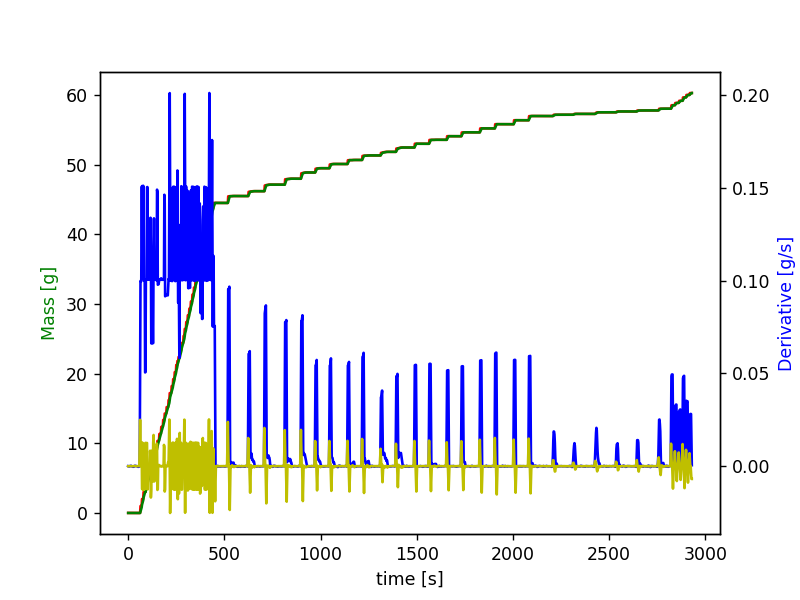

Addition of 0.996g Plantapon ACG 50 detected from 514s to 552s - expected volume = 0.95mL and actual volume = 0.884mL (resulting error is 7.003%)
Addition of 0.701g Plantacare 818 detected from 620s to 660s - expected volume = 0.767mL and actual volume = 0.644mL (resulting error is 16.084%)
Addition of 0.943g Plantacare 818 detected from 704s to 742s - expected volume = 0.846mL and actual volume = 0.869mL (resulting error is 2.767%)
Addition of 0.855g Plantacare 2000 detected from 810s to 854s - expected volume = 0.904mL and actual volume = 0.783mL (resulting error is 13.421%)
Addition of 0.896g Plantacare 2000 detected from 894s to 930s - expected volume = 0.77mL and actual volume = 0.826mL (resulting error is 7.257%)
Addition of 0.616g Plantacare 2000 detected from 968s to 1004s - expected volume = 0.524mL and actual volume = 0.567mL (resulting error is 8.14%)
Addition of 0.61g Plantacare 2000 detected from 1042s to 1076s - expected volume = 0.524mL and actual volume = 0.561mL (resul

In [6]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.0021875 g/s and for 2nd derivative = 0.00046875 g/s^2


<IPython.core.display.Javascript object>


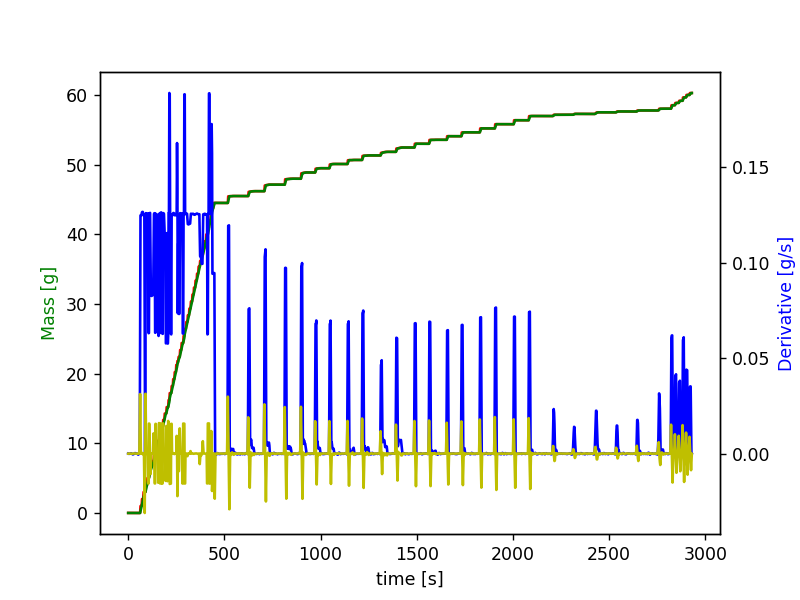

Addition of 0.2g Luviquat Excellence detected from 2100s to 2232s - expected volume = 0.193mL and actual volume = 0.18mL (resulting error is 6.776%)
Addition of 0.121g Luviquat Excellence detected from 2308s to 2330s - expected volume = 0.108mL and actual volume = 0.11mL (resulting error is 1.471%)
Addition of 0.233g Luviquat Excellence detected from 2422s to 2454s - expected volume = 0.219mL and actual volume = 0.211mL (resulting error is 3.667%)
Addition of 0.127g Luviquat Excellence detected from 2532s to 2552s - expected volume = 0.121mL and actual volume = 0.113mL (resulting error is 6.342%)
Addition of 0.144g Luviquat Excellence detected from 2640s to 2658s - expected volume = 0.139mL and actual volume = 0.131mL (resulting error is 5.801%)
Addition of 0.263g Luviquat Excellence detected from 2750s to 2786s - expected volume = 0.24mL and actual volume = 0.239mL (resulting error is 0.331%)


In [7]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.0015625 g/s^2


<IPython.core.display.Javascript object>


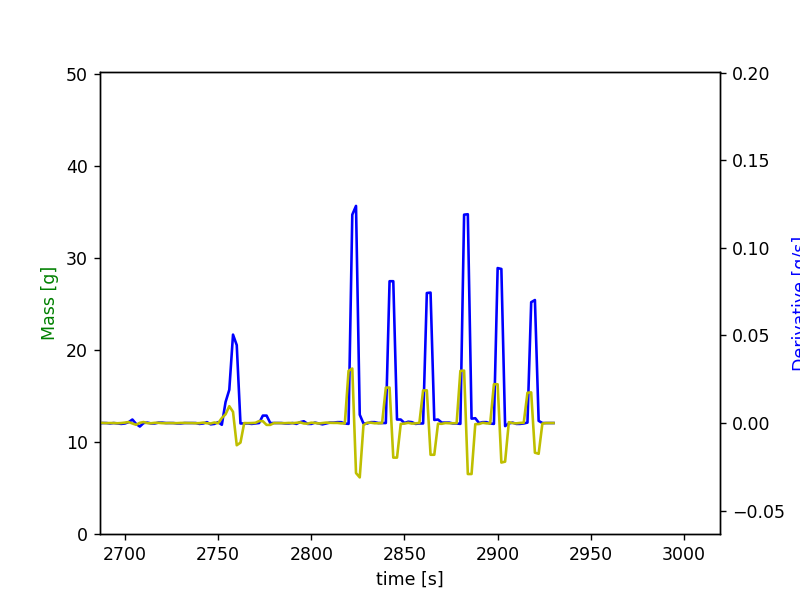

Addition of 0.494g Arlypon F detected from 2818s to 2830s - expected volume = 0.562mL and actual volume = 0.562mL (resulting error is 0.0%)
Addition of 0.332g Arlypon F detected from 2838s to 2850s - expected volume = 0.351mL and actual volume = 0.381mL (resulting error is 8.497%)
Addition of 0.303g Arlypon F detected from 2858s to 2870s - expected volume = 0.322mL and actual volume = 0.346mL (resulting error is 7.244%)
Addition of 0.485g Arlypon F detected from 2878s to 2890s - expected volume = 0.528mL and actual volume = 0.542mL (resulting error is 2.754%)
Addition of 0.349g Arlypon F detected from 2896s to 2908s - expected volume = 0.375mL and actual volume = 0.399mL (resulting error is 6.402%)
Addition of 0.28g Arlypon F detected from 2914s to 2926s - expected volume = 0.299mL and actual volume = 0.321mL (resulting error is 7.28%)


In [8]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [ ]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_280323_S229-S228.csv', index=False)
actualMassFractions